In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

data_path = "all_data_engineered.csv"

df = pd.read_csv(data_path)
print(df.shape)
df.head()

(20845, 34)


,contracting_authority,reference_number,procurement_object,procedure_type,contract_type,framework_agreement_type,limit_fund,publication_date,opening_date,closing_date,is_canceled,cancellation_reason,is_suspended,winner_name,winner_nipt,winner_value,winner_value_at_contract_signing,contract_signed_with_vat,num_bids_submitted,num_bids_qualified,cpv_codes,fund_usage,value_changed_at_contract_signing,is_single_bidder,is_single_qualified_bid,tender_duration_days,is_over_budget,company_total_wins,company_total_value,company_avg_fund_usage,company_total_single_bid_wins,company_total_canceled_wins,company_single_bid_win_rate,company_cancellation_rate
0,Bashkia Patos,REF-58813-08-22-2025,Shërbim për licensimin e paketës microsoft off...,Small Value,Services,NaN,500000.00,2025-08-22,2025-08-22,2025-08-26,Jo,NaN,Jo,VODAFONE ALBANIA,K11715005L,314000.0,NaN,Jo,16,7,72267100-0 Mirëmbajtja e softwareve të teknol...,0.628000,NaN,False,False,4.0,False,18.0,10847908.00,0.856723,0.0,0.0,0.000000,0.000000
1,Universiteti i Mjekesise Tirane,REF-45062-04-15-2025,Blerje produkte të dizenjuara dhe printuara pë...,Small Value,Supplies,NaN,583333.33,2025-04-15,2025-04-15,2025-04-16,Jo,NaN,Jo,UNIQUE AWARDS,M47009701K,489000.0,NaN,Jo,15,13,"22100000-1 Libra të shtypur, broshura dhe fle...",0.838286,NaN,False,False,1.0,False,7.0,2644000.00,0.879583,0.0,0.0,0.000000,0.000000
2,Qendra Shendetesore Maliq,REF-44157-04-08-2025,Blerje Reagente per Laboratorin Klinik-Biokimik,Small Value,Supplies,NaN,120000.00,2025-04-08,2025-04-08,2025-04-09,Jo,NaN,Jo,KRIJON,K12023001A,108000.0,NaN,Jo,2,2,33696500-0 Reagentë për laborator,0.900000,NaN,False,False,1.0,False,23.0,45096256.25,0.849149,5.0,4.0,0.217391,0.173913
3,Operatori i Blerjeve te Perqendruara,REF-42930-03-28-2025,"Riparim dhe mirëmbajtje automjetesh, ndarë në ...",Open INT,Services,Marreveshje Kuader me disa Operatore Ekonomik,20962408.00,2025-04-01,2025-04-01,2025-05-02,Jo,NaN,Jo,NaN,UNKNOWN,0.0,NaN,Jo,0,0,50112110-7 Shërbime riparimi për automjete,0.000000,NaN,False,False,31.0,False,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000
4,Komisioni Qendror i Zgjedhjeve,REF-64907-10-14-2025,Prodhim shenja identiteti (bexhe pvc) dhe etik...,Negotiated without Notice,Supplies,NaN,4275683.00,2025-10-14,2025-10-14,2025-10-17,Po,në procedurat me një fazë nuk është dorëzuar a...,Jo,NaN,UNKNOWN,0.0,NaN,Jo,1,0,22455000-4 Karta identiteti,0.000000,NaN,True,False,3.0,False,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000


In [2]:
# Notebook 1: Quick sanity check on key columns

key_cols = [
    "winner_nipt",
    "fund_usage",
    "value_changed_at_contract_signing",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_total_value",
    "company_avg_fund_usage",
    "company_total_single_bid_wins",
    "company_total_canceled_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
]

missing = [c for c in key_cols if c not in df.columns]
print("Missing columns:", missing)

df[key_cols].describe(include="all")


Missing columns: []


,winner_nipt,fund_usage,value_changed_at_contract_signing,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_total_value,company_avg_fund_usage,company_total_single_bid_wins,company_total_canceled_wins,company_single_bid_win_rate,company_cancellation_rate
count,20845,16950.000000,1.677000e+03,20845,20845,20845.000000,20845.000000,2.084500e+04,20845.000000,20845.000000,20845.000000,20845.000000,20845.000000
unique,2261,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UNKNOWN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4078,NaN,NaN,18369,16745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.656866,4.512858e+06,NaN,NaN,6.202159,74.698537,3.301209e+07,0.619065,4.398465,4.581243,0.089566,0.072391
std,NaN,0.360165,2.341125e+07,NaN,NaN,7.535339,151.663769,8.029633e+07,0.361732,18.998208,8.285498,0.234571,0.131029
min,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.502503,2.798400e+05,NaN,NaN,1.000000,2.000000,2.400000e+05,0.580245,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.799855,6.863219e+05,NaN,NaN,3.000000,16.000000,9.572200e+06,0.794923,0.000000,1.000000,0.000000,0.017341
75%,NaN,0.948791,1.959400e+06,NaN,NaN,8.000000,59.000000,3.062660e+07,0.865610,1.000000,5.000000,0.015692,0.081967


In [3]:
# Notebook 2: Helper – safe min-max normalization

def minmax_series(s: pd.Series) -> pd.Series:
    s = s.astype(float)
    s_min = s.min()
    s_max = s.max()
    if pd.isna(s_min) or pd.isna(s_max) or s_max == s_min:
        return pd.Series(0.0, index=s.index)
    return (s - s_min) / (s_max - s_min)

df["company_total_wins_norm"] = minmax_series(df["company_total_wins"])
df["num_bids_qualified_norm"] = minmax_series(df["num_bids_qualified"])

df[["company_total_wins", "company_total_wins_norm",
    "num_bids_qualified", "num_bids_qualified_norm"]].head()


,company_total_wins,company_total_wins_norm,num_bids_qualified,num_bids_qualified_norm
0,18.0,0.025678,7,0.118644
1,7.0,0.009986,13,0.220339
2,23.0,0.032810,2,0.033898
3,0.0,0.000000,0,0.000000
4,0.0,0.000000,0,0.000000


In [8]:
# Notebook 3: create interpretable risk components

for col in [
    "is_single_bidder",
    "is_single_qualified_bid",
    "fund_usage",
    "is_over_budget",
    "value_changed_at_contract_signing",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
]:
    if col in df.columns:
        df[col] = df[col].astype(float)

# 1. Competition Risk
df["competition_risk"] = (
    0.40 * df["is_single_bidder"] +
    0.25 * df["is_single_qualified_bid"] +
    0.20 * df["company_single_bid_win_rate"] +
    0.10 * (1 - df["company_total_wins_norm"]) +
    0.05 * (1 - df["num_bids_qualified_norm"])
)

df["competition_risk"] = df["competition_risk"].clip(0, 1)


# 2. Budget Risk

# ensure float type
for col in ["fund_usage", "is_over_budget", "value_changed_at_contract_signing"]:
    df[col] = df[col].astype(float)

# whether value changed at contract signing
df["value_changed_flag"] = (df["value_changed_at_contract_signing"] != 0).astype(float)

df["budget_risk"] = (
    0.50 * df["fund_usage"] +
    0.35 * df["is_over_budget"] +
    0.15 * df["value_changed_flag"]
)
df["budget_risk"] = df["budget_risk"].clip(0, 1)

df["budget_risk"].describe()


# 3. Historical Risk
df["historical_risk"] = (
    0.55 * df["company_cancellation_rate"] +
    0.45 * df["company_single_bid_win_rate"]
)

df["historical_risk"] = df["historical_risk"].clip(0, 1)

df[["competition_risk", "budget_risk", "historical_risk"]].describe()


,competition_risk,budget_risk,historical_risk
count,20845.000000,16950.000000,20845.000000
mean,0.248686,0.487023,0.080120
std,0.247057,0.197112,0.119376
min,0.044664,0.000338,0.000000
25%,0.133999,0.401153,0.000000
50%,0.145763,0.547445,0.025000
75%,0.172197,0.623400,0.104054
max,0.999010,1.000000,1.000000


In [22]:
# Notebook 4*: OECD create detailed risk components
df["integrity_risk"] = (
    0.6 * df["is_single_bidder"].astype(float) +
    0.4 * df["company_single_bid_win_rate"].astype(float)
).clip(0, 1)

df["process_risk"] = (
    0.7 * df["is_single_qualified_bid"].astype(float) +
    0.3 * (1 - df["num_bids_qualified_norm"])
).clip(0, 1)

# price change flag
df["value_changed_flag"] = (df["value_changed_at_contract_signing"] != 0).astype(float)

df["financial_risk"] = (
    0.55 * df["fund_usage"].astype(float) +
    0.30 * df["is_over_budget"].astype(float) +
    0.15 * df["value_changed_flag"]
).clip(0, 1)

df["delivery_risk"] = df["company_cancellation_rate"].astype(float).clip(0, 1) # assuming cancellation rate indicates delivery risk

df["risk_oecd_linear"] = (
    0.35 * df["integrity_risk"] +
    0.30 * df["financial_risk"] +
    0.20 * df["process_risk"] +
    0.15 * df["delivery_risk"]
)

alpha = 5
center = 0.5
z = alpha * (df["risk_oecd_linear"] - center)
df["risk_score"] = 1 / (1 + np.exp(-z))

In [23]:
low_q = df["risk_score"].quantile(0.60)
high_q = df["risk_score"].quantile(0.85)

def classify(score):
    if score < low_q: return "Low"
    elif score < high_q: return "Medium"
    else: return "High"

df["risk_level"] = df["risk_score"].apply(classify)


array([[<AxesSubplot:title={'center':'integrity_risk'}>,
        <AxesSubplot:title={'center':'process_risk'}>],
       [<AxesSubplot:title={'center':'financial_risk'}>,
        <AxesSubplot:title={'center':'delivery_risk'}>],
       [<AxesSubplot:title={'center':'risk_score'}>, <AxesSubplot:>]],
      dtype=object)

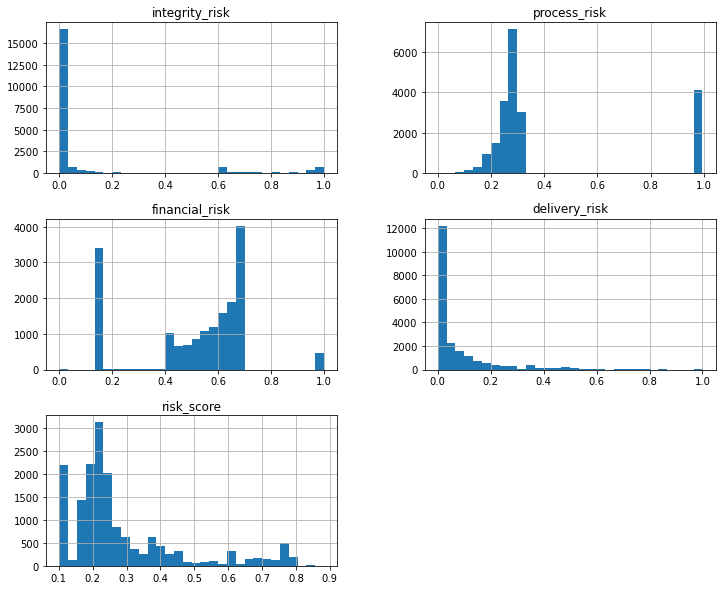

In [24]:
cols = ["integrity_risk","process_risk","financial_risk","delivery_risk","risk_score"]
df[cols].hist(bins=30, figsize=(12,10))


In [25]:
# Notebook 7: check some high-risk examples for case studies

cols_to_show = [
    "contracting_authority",
    "reference_number",
    "procurement_object",
    "fund_usage",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
    "competition_risk",
    "budget_risk",
    "historical_risk",
    "risk_score",
    "risk_level",
]

high_risk_examples = (
    df[df["risk_level"] == "High"]
    .sort_values("risk_score", ascending=False)
    .head(10)[cols_to_show]
)

high_risk_examples


,contracting_authority,reference_number,procurement_object,fund_usage,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_single_bid_win_rate,company_cancellation_rate,competition_risk,budget_risk,historical_risk,risk_score,risk_level
9043,Qendra Kombetare e Biznesit,REF-62525-09-24-2025,Program trajnimi për stafin e asistencës të QKB,0.969388,1.0,1.0,1,1.0,1.000000,1.000000,0.999010,0.634694,1.000000,0.882846,High
15967,Inspektorati Larte Deklarimit dhe Kontrollit P...,REF-39844-03-04-2025,Sherbim per sigurimin vjetor te automjeteve,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.848568,High
14792,Agjencia Kombëtare e Pyjeve,REF-43167-04-02-2025,Blerje siguracion (TPL) per automjetet,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.848568,High
18212,Ndermarrja e Sherbimeve Publike Sarande,REF-44958-04-14-2025,Shpenzime për siguracionin e mjeteve të trans...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.848568,High
6209,ILLYRIAN GUARD SH.A,REF-50179-06-04-2025,Shpenzimet e siguracionit te mjeteve te transp...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.848568,High
395,Drejtoria Vendore e Policise Diber,REF-60916-09-10-2025,Shpenzime Siguracionesh mjetesh sipas nevojes ...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.848568,High
1223,Inspektorati Shteteror i Mbikeqyrjes se Tregut,REF-40439-03-07-2025,Pajisje me siguracion mjeti,1.000000,1.0,1.0,1,54.0,0.962963,0.000000,0.984042,1.000000,0.433333,0.847999,High
19875,Drejtoria Rajonale e Kufirit dhe Migracionit D...,REF-60071-09-02-2025,Shpenzime për sigurimin e automjeteve,1.000000,1.0,1.0,1,174.0,0.919540,0.000000,0.958239,1.000000,0.413793,0.844039,High
5232,Reparti Ushtarak Nr.6630 Tirane,REF-36605-02-03-2025,Shpenzime per siguracionet per mjetet e transp...,1.000000,1.0,1.0,1,174.0,0.919540,0.000000,0.958239,1.000000,0.413793,0.844039,High
11691,Reparti Ushtarak Nr.6630 Tirane,REF-38440-02-18-2025,Shpenzime per sigurimin e objekteve ndertimore,1.000000,1.0,1.0,1,174.0,0.919540,0.000000,0.958239,1.000000,0.413793,0.844039,High


In [26]:
# Notebook 8: export complete dataset with risk scores for later LLM experiments

output_path = "all_data_with_risk_scores.csv"
df.to_csv(output_path, index=False)
print("Saved:", output_path)


Saved: all_data_with_risk_scores.csv


In [30]:
# Notebook 9: export text summary for LLM prompt (raw-data style)

def build_case_summary(row: pd.Series) -> str:
    """
    Construct a natural language description of the tender
    using mostly raw fields, without exposing our risk model
    or any OECD-based aggregation.
    """
    # 一些字段可能不存在，用 row.get 更安全
    authority = row.get("contracting_authority", "Unknown authority")
    obj = row.get("procurement_object", "unspecified object")
    ctype = row.get("contract_type", "unspecified contract type")
    proc_type = row.get("procedure_type", "unspecified procedure") if "procedure_type" in row else "unspecified procedure"

    # 金额相关：尽量给“原始值 + 简单比值”，但不提“风险”
    limit_fund = row.get("limit_fund", None)
    winner_value = row.get("winner_value", None)
    fund_usage = row.get("fund_usage", None)

    # 投标结构
    num_bids_total = row.get("num_bids_submitted", None) if "num_bids_submitted" in row else None
    num_bids_qualified = row.get("num_bids_qualified", None)
    is_single_bidder = row.get("is_single_bidder", None)
    is_single_qualified_bid = row.get("is_single_qualified_bid", None)

    # 中标公司历史
    total_wins = row.get("company_total_wins", None)
    total_value = row.get("company_total_value", None)
    single_bid_win_rate = row.get("company_single_bid_win_rate", None)
    cancellation_rate = row.get("company_cancellation_rate", None)

    parts = []

    # 基本信息
    parts.append(f"The contracting authority is {authority}.")
    parts.append(f"They are procuring: {obj}.")
    parts.append(f"The contract type is {ctype}, using the procedure type: {proc_type}.")

    # 金额
    if limit_fund is not None and winner_value is not None:
        parts.append(
            f"The limit fund for this procedure is {limit_fund:.2f}, "
            f"and the winning offer value is {winner_value:.2f}."
        )
    elif winner_value is not None:
        parts.append(f"The winning offer value is {winner_value:.2f}.")
    if fund_usage is not None:
        parts.append(f"The ratio winner_value / limit_fund is {fund_usage:.2f}.")

    # 投标结构
    if num_bids_total is not None:
        parts.append(f"There were {int(num_bids_total)} bids submitted in total.")
    if num_bids_qualified is not None:
        parts.append(f"{int(num_bids_qualified)} bids were qualified.")
    if is_single_bidder is not None:
        parts.append(f"Single bidder flag: {int(is_single_bidder)}.")
    if is_single_qualified_bid is not None:
        parts.append(f"Single qualified bidder flag: {int(is_single_qualified_bid)}.")

    # 供应商历史
    if total_wins is not None:
        parts.append(f"The winning supplier has won {int(total_wins)} contracts in 2025.")
    if total_value is not None:
        parts.append(f"The total value of these contracts is {total_value:.2f}.")
    if single_bid_win_rate is not None:
        parts.append(f"The supplier's share of wins in single-bid procedures is {single_bid_win_rate:.2f}.")
    if cancellation_rate is not None:
        parts.append(f"The supplier's historical cancellation rate is {cancellation_rate:.2f}.")

    return " ".join(parts)


df["llm_summary"] = df.apply(build_case_summary, axis=1)
df[["llm_summary", "risk_level"]].head()


,llm_summary,risk_level
0,The contracting authority is Bashkia Patos. Th...,Low
1,The contracting authority is Universiteti i Mj...,Low
2,The contracting authority is Qendra Shendeteso...,Medium
3,The contracting authority is Operatori i Blerj...,Low
4,The contracting authority is Komisioni Qendror...,Medium


In [33]:
df["llm_summary"][0]


"The contracting authority is Bashkia Patos. They are procuring: Shërbim për licensimin e paketës microsoft office business standard. The contract type is Services, using the procedure type: Small Value. The limit fund for this procedure is 500000.00, and the winning offer value is 314000.00. The ratio winner_value / limit_fund is 0.63. There were 16 bids submitted in total. 7 bids were qualified. Single bidder flag: 0. Single qualified bidder flag: 0. The winning supplier has won 18 contracts in 2025. The total value of these contracts is 10847908.00. The supplier's share of wins in single-bid procedures is 0.00. The supplier's historical cancellation rate is 0.00."

In [39]:
# %% 10: sample subset for LLM evaluation

import numpy as np

print(df["risk_level"].value_counts(dropna=False))

# sample N_PER_LEVEL from each risk level
N_PER_LEVEL = 100  

eval_samples = []

for level in ["Low", "Medium", "High"]:
    subset = df[df["risk_level"] == level]
    if len(subset) == 0:
        continue
    n_sample = min(N_PER_LEVEL, len(subset))
    eval_samples.append(
        subset.sample(n_sample, random_state=42)
    )

eval_df = pd.concat(eval_samples).reset_index(drop=True)
print(eval_df["risk_level"].value_counts())

# only keep necessary columns for LLM evaluation
cols_for_llm = [
    "reference_number",
    "contracting_authority",
    "procurement_object",
    "contract_type",
    "fund_usage",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
    "competition_risk",
    "budget_risk",
    "historical_risk",
    "risk_score",
    "risk_level",
    "llm_summary",  # text summary for LLM prompt
]

eval_df = eval_df[cols_for_llm]

eval_output_path = "eval_subset_for_llm.csv"
eval_df.to_csv(eval_output_path, index=False)
print("Saved eval subset to:", eval_output_path)

eval_df.head()


Low       10170
High       6438
Medium     4237
Name: risk_level, dtype: int64
Low       100
Medium    100
High      100
Name: risk_level, dtype: int64
Saved eval subset to: eval_subset_for_llm.csv


,reference_number,contracting_authority,procurement_object,contract_type,fund_usage,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_single_bid_win_rate,company_cancellation_rate,competition_risk,budget_risk,historical_risk,risk_score,risk_level,llm_summary
0,REF-48385-05-20-2025,Bashkia Rrogozhine,Korrese bari,Supplies,0.827660,0.0,0.0,22,18.0,0.000000,0.111111,0.128788,0.563830,0.061111,0.210700,Low,The contracting authority is Bashkia Rrogozhin...
1,REF-39432-02-27-2025,Drejtoria Rajonale e Sigurimeve Shoqerore Tropoje,"Sherbime per ngrohje (lende djegese ,karburant...",Supplies,0.000077,0.0,0.0,2,59.0,0.271186,0.016949,0.194126,0.150038,0.131356,0.143987,Low,The contracting authority is Drejtoria Rajonal...
2,REF-50119-06-04-2025,Agjencia e Sigurimit te Cilesise ne Arsimin e ...,Blerje bileta transporti ajror nderkombetar,Services,0.654286,0.0,0.0,7,335.0,0.000000,0.035821,0.096279,0.477143,0.019701,0.190936,Low,The contracting authority is Agjencia e Siguri...
3,REF-48470-05-21-2025,Qendra Sportive Korçe,Aktivitet dhe dekor per 1 Qershorin tek Qyteza...,Services,0.959980,0.0,0.0,12,9.0,0.000000,0.111111,0.138547,0.629990,0.061111,0.238540,Low,The contracting authority is Qendra Sportive K...
4,REF-44408-04-09-2025,Drejtoria e Pergjithshme e Metrologjise dhe Ka...,Blerje tretësirë referuese të alkoolit,Supplies,0.786212,0.0,0.0,2,2.0,0.000000,0.000000,0.148020,0.543106,0.000000,0.208079,Low,The contracting authority is Drejtoria e Pergj...


In [ ]:
from pydantic import BaseModel

class LLMRiskDecision(BaseModel):
    risk_label: str
    explanation: str
    
USER_PROMPT_TEMPLATE = """
You are an expert auditor evaluating public procurement cases.
Read the case summary carefully and classify the overall corruption / integrity risk as Low, Medium, or High.
Base your judgment only on the information present in the summary.

Summary:
{summary}

Please output ONLY the following fields in JSON:
- risk_label: "Low", "Medium", or "High"
- explanation: a brief 2-4 sentence justification

Your answer MUST match this JSON schema exactly.
"""

from openai import OpenAI
client = OpenAI(
    api_key=""
)

from tqdm.notebook import tqdm
import json

output_path = "eval_llm_results.jsonl"

# 清空文件
open(output_path, "w").close()

for idx, row in tqdm(eval_df.iterrows(), total=len(eval_df)):
    user_prompt = USER_PROMPT_TEMPLATE.format(summary=row["llm_summary"])

    try:
        response = client.responses.parse(
            model="gpt-4o-2024-08-06",
            input=user_prompt,
            text_format=LLMRiskDecision,
        )
        parsed = response.output_parsed

        record = {
            "id": int(idx),
            "llm_label": parsed.risk_label,
            "llm_explanation": parsed.explanation
        }

    except Exception as e:
        record = {
            "id": int(idx),
            "llm_label": "ERROR",
            "llm_explanation": str(e)
        }

    # ---- 每条记录立即 append ----
    with open(output_path, "a", encoding="utf-8") as f:
        f.write(json.dumps(record, ensure_ascii=False) + "\n")



  0%|          | 0/300 [00:00<?, ?it/s]

In [46]:
# %% 13: Parse LLM JSONL output and merge back into eval_df

import json
import pandas as pd

jsonl_path = "eval_llm_results.jsonl"

records = []
with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            records.append(json.loads(line))
        except Exception as e:
            print("JSON decode error:", e, "line:", line)

llm_df = pd.DataFrame(records)   # columns: id, llm_label, llm_explanation

# ensure eval_df has id column
eval_df = eval_df.reset_index().rename(columns={"index": "id"})

eval_merged = eval_df.merge(llm_df, on="id", how="left")

eval_merged[["id", "risk_level", "llm_label", "llm_explanation"]].head()


,id,risk_level,llm_label,llm_explanation
0,0,Low,Medium,The procurement process shows a healthy level ...
1,1,Low,High,The winning offer value is suspiciously low at...
2,2,Low,Medium,While the contract was awarded through a compe...
3,3,Low,Medium,The procurement case presents a medium risk le...
4,4,Low,Low,The procurement case shows a competitive biddi...


In [47]:
# %% 14: agreement rate + confusion matrix + Spearman correlation

from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import spearmanr

# 这里用的是前面 merge 完成后的 eval_merged
# 确保它里边有: "risk_level"（rule-based）和 "llm_label"（LLM 输出）

mask_valid = eval_merged["llm_label"].isin(["Low", "Medium", "High"])
eval_clean = eval_merged[mask_valid].copy()

print("Valid rows:", len(eval_clean), " / ", len(eval_merged))

y_true = eval_clean["risk_level"]
y_pred = eval_clean["llm_label"]

print("== Confusion Matrix (rows = rule model, cols = LLM) ==")
print(confusion_matrix(y_true, y_pred, labels=["Low", "Medium", "High"]))

print("\n== Classification Report (LLM vs Rule Model) ==")
print(classification_report(y_true, y_pred, labels=["Low", "Medium", "High"]))

# Spearman correlation (treat Low/Medium/High as ordinal 0/1/2)
label_to_score = {"Low": 0, "Medium": 1, "High": 2}
true_score = y_true.map(label_to_score)
pred_score = y_pred.map(label_to_score)

rho, pval = spearmanr(true_score, pred_score)
print(f"\nSpearman correlation between rule risk_level and LLM label: rho={rho:.3f}, p={pval:.3g}")


Valid rows: 299  /  300
== Confusion Matrix (rows = rule model, cols = LLM) ==
[[28 49 23]
 [ 1 88 11]
 [ 1 32 66]]

== Classification Report (LLM vs Rule Model) ==
              precision    recall  f1-score   support

         Low       0.93      0.28      0.43       100
      Medium       0.52      0.88      0.65       100
        High       0.66      0.67      0.66        99

    accuracy                           0.61       299
   macro avg       0.70      0.61      0.58       299
weighted avg       0.70      0.61      0.58       299


Spearman correlation between rule risk_level and LLM label: rho=0.457, p=8.05e-17


In [52]:
# %% 16: save full rule-based risk details for each case (from df, not eval_df)

# 这些是你 rule-based OECD 模型用到的列名
rule_components = [
    # OECD risk dimensions
    "integrity_risk",
    "process_risk",
    "financial_risk",
    "delivery_risk",
    
    # raw signals feeding each dimension
    "is_single_bidder",
    "company_single_bid_win_rate",
    "num_bids_qualified",
    "is_single_qualified_bid",
    "fund_usage",
    # 下面两个有可能你还没建，先做兼容处理
    "is_over_budget",
    "value_changed_flag",
    "company_cancellation_rate",
    
    # overall scores
    "risk_oecd_linear",
    "risk_score",
    "risk_level",
]

# 把完整的 df 也加上 id，方便和 eval_merged 对齐
# 注意：这里假设 eval_df / eval_merged 之前是通过 reset_index 得到的 id，
#       即 id 对应的是原始 df 的 index。
df_with_id = df.reset_index().rename(columns={"index": "id"})

# 看看哪些列在 df 里真的存在，哪些还没算
available = [c for c in rule_components if c in df_with_id.columns]
missing = [c for c in rule_components if c not in df_with_id.columns]

print("Available rule-based columns:", available)
print("Missing rule-based columns:", missing)

# 只从 df_with_id 里取真正存在的列
rule_dump_df = df_with_id[["id"] + available].copy()

# eval_merged 里已经有: id, llm_label, llm_explanation, risk_level (rule-based label)
# 现在把 rule-based 的各个组件 merge 进去
eval_full = eval_merged.merge(rule_dump_df, on="id", how="left")

# 保存一下，后面做 error analysis 会很方便
eval_full.to_csv("eval_full_with_rule_and_llm.csv", index=False)

print("Saved full dataset with rule-based components + LLM outputs as eval_full_with_rule_and_llm.csv")
eval_full.head()


Available rule-based columns: ['integrity_risk', 'process_risk', 'financial_risk', 'delivery_risk', 'is_single_bidder', 'company_single_bid_win_rate', 'num_bids_qualified', 'is_single_qualified_bid', 'fund_usage', 'is_over_budget', 'value_changed_flag', 'company_cancellation_rate', 'risk_oecd_linear', 'risk_score', 'risk_level']
Missing rule-based columns: []
Saved full dataset with rule-based components + LLM outputs as eval_full_with_rule_and_llm.csv


,id,reference_number,contracting_authority,procurement_object,contract_type,fund_usage_x,is_single_bidder_x,is_single_qualified_bid_x,num_bids_qualified_x,company_total_wins,company_single_bid_win_rate_x,company_cancellation_rate_x,competition_risk,budget_risk,historical_risk,risk_score_x,risk_level_x,llm_summary,llm_label,llm_explanation,integrity_risk,process_risk,financial_risk,delivery_risk,is_single_bidder_y,company_single_bid_win_rate_y,num_bids_qualified_y,is_single_qualified_bid_y,fund_usage_y,is_over_budget,value_changed_flag,company_cancellation_rate_y,risk_oecd_linear,risk_score_y,risk_level_y
0,0,REF-48385-05-20-2025,Bashkia Rrogozhine,Korrese bari,Supplies,0.827660,0.0,0.0,22,18.0,0.000000,0.111111,0.128788,0.563830,0.061111,0.210700,Low,The contracting authority is Bashkia Rrogozhin...,Medium,The procurement process shows a healthy level ...,0.000000,0.264407,0.495400,0.000000,0.0,0.000000,7,0.0,0.628000,0.0,1.0,0.000000,0.201501,0.183548,Low
1,1,REF-39432-02-27-2025,Drejtoria Rajonale e Sigurimeve Shoqerore Tropoje,"Sherbime per ngrohje (lende djegese ,karburant...",Supplies,0.000077,0.0,0.0,2,59.0,0.271186,0.016949,0.194126,0.150038,0.131356,0.143987,Low,The contracting authority is Drejtoria Rajonal...,High,The winning offer value is suspiciously low at...,0.000000,0.233898,0.611057,0.000000,0.0,0.000000,13,0.0,0.838286,0.0,1.0,0.000000,0.230097,0.205950,Low
2,2,REF-50119-06-04-2025,Agjencia e Sigurimit te Cilesise ne Arsimin e ...,Blerje bileta transporti ajror nderkombetar,Services,0.654286,0.0,0.0,7,335.0,0.000000,0.035821,0.096279,0.477143,0.019701,0.190936,Low,The contracting authority is Agjencia e Siguri...,Medium,While the contract was awarded through a compe...,0.086957,0.289831,0.645000,0.173913,0.0,0.217391,2,0.0,0.900000,0.0,1.0,0.173913,0.307988,0.276866,Medium
3,3,REF-48470-05-21-2025,Qendra Sportive Korçe,Aktivitet dhe dekor per 1 Qershorin tek Qyteza...,Services,0.959980,0.0,0.0,12,9.0,0.000000,0.111111,0.138547,0.629990,0.061111,0.238540,Low,The contracting authority is Qendra Sportive K...,Medium,The procurement case presents a medium risk le...,0.000000,0.300000,0.150000,0.000000,0.0,0.000000,0,0.0,0.000000,0.0,1.0,0.000000,0.105000,0.121853,Low
4,4,REF-44408-04-09-2025,Drejtoria e Pergjithshme e Metrologjise dhe Ka...,Blerje tretësirë referuese të alkoolit,Supplies,0.786212,0.0,0.0,2,2.0,0.000000,0.000000,0.148020,0.543106,0.000000,0.208079,Low,The contracting authority is Drejtoria e Pergj...,Low,The procurement case shows a competitive biddi...,0.600000,0.300000,0.150000,0.000000,1.0,0.000000,0,0.0,0.000000,0.0,1.0,0.000000,0.315000,0.283940,Medium


In [48]:
# mismatch = LLM 预测 ≠ rule-model 风险等级
mismatch_df = eval_merged[eval_merged["risk_level"] != eval_merged["llm_label"]].copy()

print("Mismatch cases:", len(mismatch_df))
mismatch_df[["id", "risk_level", "llm_label", "llm_explanation"]].head()


Mismatch cases: 118


,id,risk_level,llm_label,llm_explanation
0,0,Low,Medium,The procurement process shows a healthy level ...
1,1,Low,High,The winning offer value is suspiciously low at...
2,2,Low,Medium,While the contract was awarded through a compe...
3,3,Low,Medium,The procurement case presents a medium risk le...
5,5,Low,Medium,The procurement process shows a competitive en...


In [49]:
explanations = mismatch_df["llm_explanation"].tolist()
print("Collected", len(explanations), "explanations.")


Collected 118 explanations.


In [55]:
# %% 18: One-click fix — re-attach rule-based components to eval_merged via llm_summary

import pandas as pd
import textwrap

# 假设你当前环境里已经有:
# - df: 全量数据，包含所有 rule-based 列（integrity_risk, financial_risk, ...）
# - eval_merged: eval 子集 + LLM 输出 + llm_summary
# - build_case_summary: 你用来生成 llm_summary 的函数（raw-data 版本）

# 1. 在 df 上重新计算 llm_summary，确保和 eval_merged 里的字符串一模一样
print("Recomputing llm_summary on full df for robust merging ...")

df_with_sum = df.copy()
df_with_sum["llm_summary"] = df_with_sum.apply(build_case_summary, axis=1)

# 2. 选择所有 rule-based 相关组件列
rule_cols = [
    "integrity_risk",
    "process_risk",
    "financial_risk",
    "delivery_risk",
    "is_single_bidder",
    "company_single_bid_win_rate",
    "num_bids_qualified",
    "is_single_qualified_bid",
    "fund_usage",
    "is_over_budget",
    "value_changed_flag",
    "company_cancellation_rate",
    "risk_oecd_linear" if "risk_oecd_linear" in df_with_sum.columns else None,
    "risk_score",
    "risk_level",
]

# 去掉可能不存在的列（比如 risk_oecd_linear 如果没算就跳过）
rule_cols = [c for c in rule_cols if c is not None and c in df_with_sum.columns]

print("Rule-based columns found in df:", rule_cols)

rule_block = df_with_sum[["llm_summary"] + rule_cols].copy()

# 3. 用 llm_summary 做 merge，而不是用 id
print("Merging rule-based components back into eval_merged using llm_summary ...")

eval_full_fixed = eval_merged.merge(
    rule_block,
    on="llm_summary",
    how="left",
    suffixes=("", "_rule")
)

# 4. 简单检查一下有没有出现全 None 的情况
check_cols = ["integrity_risk", "process_risk", "financial_risk", "delivery_risk", "risk_score", "risk_level"]
missing_any = eval_full_fixed[check_cols].isna().any(axis=1).sum()

print(f"Rows with any missing rule-based components after merge: {missing_any} / {len(eval_full_fixed)}")

# 5. 存一份方便后面用
eval_full_fixed.to_csv("eval_full_fixed_with_rule_and_llm.csv", index=False)
print("Saved eval_full_fixed_with_rule_and_llm.csv")

# 6. 看看你刚刚那个 case_id=150 现在是否恢复正常（如果它在 eval_merged 里）
sample_case_id = 150
if "id" in eval_full_fixed.columns:
    print("\nPreview for id == 150 (if exists):")
    print(
        eval_full_fixed.loc[eval_full_fixed["id"] == sample_case_id,
                            ["id", "risk_level", "risk_score",
                             "integrity_risk", "process_risk",
                             "financial_risk", "delivery_risk",
                             "fund_usage", "is_over_budget",
                             "value_changed_flag", "company_cancellation_rate",
                             "llm_label"]]
        .head()
    )
else:
    print("\nColumn 'id' not found in eval_full_fixed; skipping id==150 preview.")


Recomputing llm_summary on full df for robust merging ...
Rule-based columns found in df: ['integrity_risk', 'process_risk', 'financial_risk', 'delivery_risk', 'is_single_bidder', 'company_single_bid_win_rate', 'num_bids_qualified', 'is_single_qualified_bid', 'fund_usage', 'is_over_budget', 'value_changed_flag', 'company_cancellation_rate', 'risk_oecd_linear', 'risk_score', 'risk_level']
Merging rule-based components back into eval_merged using llm_summary ...
Rows with any missing rule-based components after merge: 73 / 304
Saved eval_full_fixed_with_rule_and_llm.csv

Preview for id == 150 (if exists):
      id risk_level  risk_score  integrity_risk  process_risk  financial_risk  \
152  150     Medium     0.35002        0.006349      0.238983             1.0   

     delivery_risk  fund_usage  is_over_budget  value_changed_flag  \
152       0.174603         1.0             1.0                 1.0   

     company_cancellation_rate llm_label  
152                   0.174603      High  

In [57]:
# %% 20: RE-RUN full rule vs LLM comparative analysis using eval_full_fixed

import pandas as pd
import textwrap
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import spearmanr

#=========================================================
# Step 0 — Use the fixed dataset
#=========================================================

eval_full = eval_full_fixed.copy()

#=========================================================
# Step 1 — Confusion Matrix / F1 / Spearman
#=========================================================

mask_valid = eval_full["llm_label"].isin(["Low", "Medium", "High"])
eval_clean = eval_full[mask_valid].copy()

y_true = eval_clean["risk_level"]
y_pred = eval_clean["llm_label"]

print("== Confusion Matrix (Rule rows, LLM cols) ==")
print(confusion_matrix(y_true, y_pred, labels=["Low", "Medium", "High"]))

print("\n== Classification Report ==")
print(classification_report(y_true, y_pred, labels=["Low", "Medium", "High"]))

label_to_score = {"Low": 0, "Medium": 1, "High": 2}
rho, pval = spearmanr(
    y_true.map(label_to_score),
    y_pred.map(label_to_score)
)
print(f"\nSpearman correlation: rho={rho:.3f}, p={pval:.3g}")

#=========================================================
# Step 2 — Identify mismatches
#=========================================================

mismatch_df = eval_full[eval_full["risk_level"] != eval_full["llm_label"]].copy()
mismatch_df = mismatch_df.reset_index(drop=True)

print(f"\nTotal mismatched samples: {len(mismatch_df)}")

# For prompt readability, sample up to 60
N = 60
if len(mismatch_df) > N:
    sample_df = mismatch_df.sample(N, random_state=42).reset_index(drop=True)
    print(f"Sampled {N} mismatched cases.")
else:
    sample_df = mismatch_df

#=========================================================
# Step 3 — Build meta-analysis prompt
#=========================================================

header = textwrap.dedent("""
You are an expert researcher analyzing failure modes of LLMs in public procurement
corruption / integrity risk assessment.

Below are cases where the LLM's assigned risk label DOES NOT MATCH the structured
OECD-aligned rule-based model.

For each case, you are given:
- The rule-based risk level
- The LLM-predicted label
- The LLM explanation
- The full rule-based score decomposition:
  * integrity_risk
  * process_risk
  * financial_risk
  * delivery_risk
  * underlying raw signals (bids, fund usage, cancellations, etc.)
  * final risk_score

Your tasks:

1. Identify recurring LLM reasoning failures:
   - Overweighting certain signals
   - Underweighting key risk indicators
   - Misinterpreting competitive structure
   - Overreacting to fund_usage
   - Ignoring cancellation history
   - Poor multi-factor aggregation
   - Upward/Downward bias
   - Contradictory logic

2. Group the cases into named failure modes:
   - Give each mode a short descriptive name
   - Explain the reasoning flaw
   - Show 1–2 representative examples
   - Explain why the rule-based OECD model disagrees

3. Finish with a summary:
   - Systemic weaknesses of LLMs in public procurement risk reasoning
   - Risks of relying on LLMs for integrity screening
   - Why rule-based OECD scoring is more policy-grounded and reliable

Here are the mismatched cases:
""").strip()

blocks = [header, ""]

for i, row in sample_df.iterrows():
    block = textwrap.dedent(f"""
    ---
    case_id: {row['id']}

    RULE-BASED OUTPUT:
        rule_level: {row['risk_level']}
        risk_score: {row.get('risk_score')}
        integrity_risk: {row.get('integrity_risk')}
        process_risk: {row.get('process_risk')}
        financial_risk: {row.get('financial_risk')}
        delivery_risk: {row.get('delivery_risk')}

        raw_signals:
            is_single_bidder: {row.get('is_single_bidder')}
            company_single_bid_win_rate: {row.get('company_single_bid_win_rate')}
            num_bids_qualified: {row.get('num_bids_qualified')}
            is_single_qualified_bid: {row.get('is_single_qualified_bid')}
            fund_usage: {row.get('fund_usage')}
            is_over_budget: {row.get('is_over_budget')}
            value_changed_flag: {row.get('value_changed_flag')}
            company_cancellation_rate: {row.get('company_cancellation_rate')}

    LLM OUTPUT:
        llm_label: {row['llm_label']}
        llm_explanation: {row['llm_explanation']}
    """).strip()

    blocks.append(block)

full_prompt = "\n\n".join(blocks)

#=========================================================
# Step 4 — Save to file
#=========================================================

output_path = "llm_rule_vs_rule_mismatch_prompt_FIXED.txt"
with open(output_path, "w", encoding="utf-8") as f:
    f.write(full_prompt)

print(f"\nMeta-analysis prompt saved to: {output_path}")

# Show preview
print("\n===== PROMPT PREVIEW =====\n")
print(full_prompt[:1000])
print("\n...[TRUNCATED]...\n")


== Confusion Matrix (Rule rows, LLM cols) ==
[[28 49 25]
 [ 1 88 11]
 [ 1 32 68]]

== Classification Report ==
              precision    recall  f1-score   support

         Low       0.93      0.27      0.42       102
      Medium       0.52      0.88      0.65       100
        High       0.65      0.67      0.66       101

    accuracy                           0.61       303
   macro avg       0.70      0.61      0.58       303
weighted avg       0.70      0.61      0.58       303


Spearman correlation: rho=0.447, p=2.85e-16

Total mismatched samples: 120
Sampled 60 mismatched cases.

Meta-analysis prompt saved to: llm_rule_vs_rule_mismatch_prompt_FIXED.txt

===== PROMPT PREVIEW =====

You are an expert researcher analyzing failure modes of LLMs in public procurement
corruption / integrity risk assessment.

Below are cases where the LLM's assigned risk label DOES NOT MATCH the structured
OECD-aligned rule-based model.

For each case, you are given:
- The rule-based risk level
- T